In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc,make_scorer,confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

import random
from scipy import interp
import pandas as pd
import numpy as np
import os

from matplotlib import pylab as plt

In [2]:
def plot_confusion_matrix(cm, accuracy, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title +' [Acc = %.2f]'%accuracy)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #1 = treated, 0 = untreated


    fmt = '.2f'
    thresh = 0.5
    for i, j,val in zip([0.25, 0.75, 0.25, 0.75], [0.25, 0.25, 0.75, 0.75],cm.flatten()):
        plt.text(i,j,format(val, fmt),horizontalalignment="center",
                color="white" if val > thresh else "black")

    plt.xlim([0, 1])
    plt.ylim([1, 0])
    plt.xticks([1,0])
    plt.yticks([1,0])


In [3]:
from sklearn.feature_selection import RFE

fp_in = open('../data/Machine_Learning/DrugPair_Feature_Overview.csv','r')
feature_names = fp_in.readline().strip().split(',')[4:]


X = []
y = []
for line in fp_in:
    tmp = line.strip().split(',')
    y.append(int(tmp[2]))
    X.append([float(x) for x in tmp[4:]])
    

#Impute 'nan' values
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imp.fit_transform(X)      

#transform into numpy arrays
X = np.array(X)
y = np.array(y)    

print 'Start RFE:'
estimator = RandomForestClassifier(max_depth=None,criterion='gini',n_estimators=20,class_weight='balanced',random_state =10000,max_features=None, verbose=50)
selector = RFE(estimator, None, step=1)
selector = selector.fit(X, y)

#print selector.support_ 
fp_out = open('../results/Machine_Learning/RFE_FeatureSelection.csv','w')
fp_out.write(','.join([str(x) for x in selector.support_])+'\n')
for name, selection in zip(feature_names,selector.support_ ):
    if selection == True:
        fp_out.write(name+'\n')
fp_out.close()


Start RFE:
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 20
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
building tree 2 of 20
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s
building tree 3 of 20
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s
building tree 4 of 20
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s
building tree 5 of 20
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s remaining:    0.0s
building tree 6 of 20


KeyboardInterrupt: 

In [4]:
fp_in = open('../data/Machine_Learning/DrugPair_Feature_Overview.csv','r')
feature_names = fp_in.readline().strip().split(',')[4:]


X = []
y = []
for line in fp_in:
    tmp = line.strip().split(',')
    y.append(int(tmp[2]))
    X.append([float(x) for x in tmp[4:]])
    
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imp.fit_transform(X)      
print 'Done Imputing'

fp_out =  open('../results/Machine_Learning/FeatureCorrelation.csv','w')
for i in range(0,len(feature_names)):
#for i in range(0,2):
    for i2 in range(0,len(feature_names)):
        if i < i2:
            values1 = [val[i] for val in X]
            values2 = [val[i2] for val in X]

            p = np.corrcoef(values1,values2)[0][1]
            fp_out.write(feature_names[i] + ',' + feature_names[i2] + ',' + str(p)+'\n')
fp_out.close()
        


Done Imputing


Increasing
Number of interactions: 330
Calculate variation (std) around ROC (for plotting)
Done
Calculate CV:
Done
AUROC (10xCV - 95% CI): 0.67 (+/-) 0.03
Accuracy: 0.99
Recall: 0.00
Precission: 0.00
Normalized confusion matrix
[[9.99886299e-01 1.13700966e-04]
 [1.00000000e+00 0.00000000e+00]]


KeyboardInterrupt: 

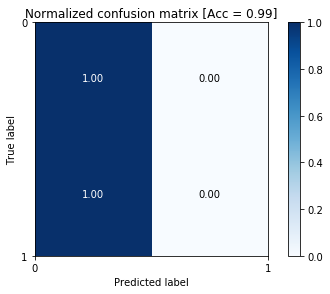

In [10]:
#Define the amount of cross validation that should be perfomred
cv = 10

#amount of estimators
num_estimators = 150

#max depth of the individual decision trees
max_depth = 25

#balannced or balanced_subsample
class_weight = 'balanced'

#number of features to consider
max_features = 'auto'



output_path = '../results/Machine_Learning/CV' +str(cv)+'_NumEst'+str(num_estimators)+'_MD'+str(max_depth)+'_CW'+ class_weight+'_MF'+ str(max_features) + '/'
directory = os.path.dirname(output_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    os.makedirs(directory+'/AUROC_Data/')


#Types of interactiosn to be analysed
interaction_types = ['All','Increasing','Decreasing','Emergent']

#drug pair feature file
fp_in = open('../data/Machine_Learning/DrugPair_Feature_Overview.csv','r')

#Go through all interaction types
for interaction_type in interaction_types[1:]:
    print interaction_type

    fp_in.seek(0)
    feature_names = fp_in.readline().strip().split(',')[4:]

    #create the value and label list
    X = []
    y = []
    for line in fp_in:
        tmp = line.strip().split(',')
        
        if interaction_type == 'All':
            y.append(int(tmp[2]))
        else:
            if  tmp[3] in [interaction_type, interaction_type+';'+interaction_type] :
                y.append(1)
            else:
                y.append(0)

        X.append([float(x) for x in tmp[4:]])

    print 'Number of interactions: %d' %sum(y)

    #Impute 'nan' values
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    X = imp.fit_transform(X)      

    #transform into numpy arrays
    X = np.array(X)
    y = np.array(y)

    #define your stratification approach
    skf = StratifiedKFold(n_splits=cv,random_state=10000, shuffle=True)

    #Calculate the std
    #########################################################################################################################
    print 'Calculate variation (std) around ROC (for plotting)'
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    for train_index, test_index in skf.split(X, y):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


        clf = RandomForestClassifier(max_depth=max_depth,criterion='gini',n_estimators=num_estimators,class_weight=class_weight,random_state =10000,max_features=max_features)
        clf.fit(X_train, y_train)

        array_scores = clf.predict_proba(X_test)

        y_score = []
        for score in array_scores:
            y_score.append(score[1])

        fpr, tpr, _ = roc_curve(y_test, y_score)

        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
    std_tpr = np.std(tprs, axis=0)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    print 'Done'



    #Calculate the mean ROC curve over 10x cross validation (only calculates the final ROC not the individual values)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
    clf = RandomForestClassifier(max_depth=max_depth,criterion='gini',n_estimators=num_estimators,class_weight=class_weight,random_state =10000,max_features=max_features)
    print 'Calculate CV:'
    results_ROC = cross_val_score(clf,X,y,cv=skf,scoring='roc_auc')
    print 'Done'

    mean_CV_ROC = results_ROC.mean()
    std_CV_ROC = results_ROC.std()
    text = "AUROC ("+str(cv)+"xCV - 95%% CI): %0.2f (+/-) %0.2f" %(mean_CV_ROC, std_CV_ROC * 1.96 / np.sqrt(len(tprs)))
    print text

    clf.fit(X_train,y_train)

    #Plot overall accuracy
    accuracy = clf.score(X_test,y_test)
    print 'Accuracy: %.2f' %accuracy


    #Plot feature importances
    fp_out = open(output_path + 'FeatureImportances_'+interaction_type+'.csv','w')
    for f,importance in zip(feature_names,clf.feature_importances_):
        fp_out.write(f +',' + str(importance)+'\n')
    fp_out.close()


    #Create ROC curve
    #get individual results for X_test (probabilityes)
    array_scores = clf.predict_proba(X_test)

    y_score = []
    for score in array_scores:
        y_score.append(score[1])

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)


    tprs_upper = np.minimum(mean_tpr + 2 *std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - 2 *std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 2 std. dev.')

    fp_out = open(output_path + 'AUROC_Data/AUROC_'+interaction_type+'.csv','w')
    fp_out.write('Legend,'+interaction_type + text[6:]+'\n')
    fp_out.write('Mean_FPR,'+';'.join([str(x) for x in mean_fpr])+'\n')
    fp_out.write('Mean_TPR,'+';'.join([str(x) for x in mean_tpr])+'\n')
    fp_out.write('Upper_TPR,'+';'.join([str(x) for x in tprs_upper])+'\n')
    fp_out.write('Lower_TPR,'+';'.join([str(x) for x in tprs_lower])+'\n')
    fp_out.close()

    #plt.plot(fpr, tpr, label=text)
    plt.plot(mean_fpr,mean_tpr,label=text,lw=2, alpha=.8, c='#40B9D4')
    plt.plot([0, 1], [0, 1], '--',label='Random', c='grey')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig(output_path+ 'ROC_AUROC_Curve_'+interaction_type+'.pdf',format='pdf',dpi=600)
    plt.close()


    # Plot the feature importances of the forest
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)*1.97/np.sqrt(len(clf.estimators_))
    indices = np.argsort(importances)[::-1]


    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(len(feature_names)), importances[indices],color="#40B9D4", yerr=std[indices]*1.96/np.sqrt(len(std[indices])), align="center")
    #plt.bar(x, y, yerr=yerr, align="center")
    plt.xticks(range(len(feature_names)), [feature_names[x] for x in indices],rotation=40)
    plt.tick_params(axis = 'x', which = 'major', labelsize = 2.5)
    plt.xlim([-1, len(feature_names)])
    plt.xlabel('Features')
    plt.ylabel('Relative Importance (95% CI)')
    #plt.show()
    plt.savefig(output_path + 'Feature_Importances_'+interaction_type+'.pdf',format='pdf',dpi=600)
    plt.close()



    total_pos = list(y_test).count(1)
    total_neg =list(y_test).count(0)




    y_pred = clf.predict(X_test)


    recall = recall_score(y_test, y_pred)
    precission = precision_score(y_test, y_pred)

    print 'Recall: %.2f' %recall
    print 'Precission: %.2f' %precission


    sensitiviy = []
    specificity = []

    for i in range(0,101):
        cut = i/float(100)

        tp  = 0
        fp = 0
        for element,ind in zip(array_scores, range(0,len(y_test))):
            if element[1] > cut and y_test[ind] == 1:
                tp += 1
            elif element[0] > 1 - cut and y_test[ind] == 0:
                fp += 1

        sensitiviy.append(tp/float(total_pos))
        specificity.append(fp/float(total_neg))

    plt.figure()
    plt.plot(sensitiviy)
    plt.plot(specificity)
    plt.legend(['Sensitivity: %.2f' %sensitiviy[50],'Specificity %.2f' %specificity[50]])
    plt.axvline(50,ls='--',lw=1, color='grey')
    #plt.show()
    plt.savefig( output_path + 'Sensitivity_Specificity_'+interaction_type+'.pdf',format='pdf',dpi=600)
    plt.close()





    cm = confusion_matrix(y_test, y_pred)




    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix(cm_normalized,accuracy, title='Normalized confusion matrix')
    #plt.show()
    plt.savefig(output_path + 'ConfusionMatrix_'+interaction_type+'.pdf',format='pdf',dpi=600)
    plt.close()


### Combine ROC curves

In [8]:
#Get the ROC curves (e.g. Increasing, Deacreasing, Emergent, All) and create one combined plot (need to be first created!)
interaction_types = ['Increasing','Decreasing','Emergent','All']
interaction_colors = {'Increasing':'#ACD900','Decreasing':'#F70020','Emergent':'#0096FF','All':'grey'}


results = [f for f in os.listdir('../results/Machine_Learning/') if os.path.isdir(os.path.join('../results/Machine_Learning/', f))]

for r in results:
    print r
    individual_results = {}


    for interaction_type in interaction_types:
        individual_results[interaction_type] = {}
        fp = open('../results/Machine_Learning/' +r+ '/AUROC_Data/AUROC_'+interaction_type+'.csv','r')
        first_line = fp.readline()
        tmp = first_line.strip().split(',')
        individual_results[interaction_type][tmp[0]] = tmp[1]
        for line in fp:
            tmp = line.strip().split(',')
            individual_results[interaction_type][tmp[0]] = [float(x) for x in tmp[1].split(';')]


    for interaction_type in interaction_types:

        #plt.fill_between(individual_results[interaction_type]['Mean_FPR'], individual_results[interaction_type]['Lower_TPR'], individual_results[interaction_type]['Upper_TPR'], color=interaction_colors[interaction_type], alpha=.2,label=r'$\pm$ 2 std. dev.')
        plt.fill_between(individual_results[interaction_type]['Mean_FPR'], individual_results[interaction_type]['Lower_TPR'], individual_results[interaction_type]['Upper_TPR'], color=interaction_colors[interaction_type], alpha=.2)
        plt.plot(individual_results[interaction_type]['Mean_FPR'],individual_results[interaction_type]['Mean_TPR'],label=individual_results[interaction_type]['Legend'],lw=2, alpha=.8, c=interaction_colors[interaction_type])
        plt.legend(loc="lower right")

    plt.title('Receiver operating characteristic')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], '--',label='Random', c='grey')
    #plt.show()
    plt.savefig('../results/Machine_Learning/' +r+ '/Combined_ROC.pdf',format='pdf',dpi=600)
    plt.close()

CV10_NumEst150_MD25_CWbalanced_MFauto


### Feature Importances

In [9]:
feature_types = ['MsigDB','PPI','ChemicalSimilarity','Kinetics','KeGG','GO','Disease','Sideeffects','ATC']

results = [f for f in os.listdir('../results/Machine_Learning/') if os.path.isdir(os.path.join('../results/Machine_Learning/', f))]

for r in results:
    for interaction_type in interaction_types:
        
        individual_results = {}
        for f in feature_types:
            individual_results[f] = []
        
        fp = open('../results/Machine_Learning/' +r+ '/FeatureImportances_'+interaction_type+'.csv','r')
        for line in fp:
            tmp = line.strip().split(',')
            feature_name = tmp[0]
            value = float(tmp[1])
            
            #print feature_name
            
            if 'Chemical' in feature_name:
                individual_results['ChemicalSimilarity'].append(value)
            elif 'PPI' in feature_name:
                individual_results['PPI'].append(value)
            elif 'Msig' in feature_name:
                individual_results['MsigDB'].append(value)
            elif 'KeGG' in feature_name:
                individual_results['KeGG'].append(value)
            elif 'SideEffects' in feature_name:
                individual_results['Sideeffects'].append(value)
            elif 'Disease' in feature_name:
                individual_results['Disease'].append(value)
            elif 'GO' in feature_name:
                individual_results['GO'].append(value)
            elif 'Enzymes' in feature_name or 'Carriers' in feature_name or 'Transporters' in feature_name:
                individual_results['Kinetics'].append(value)
            elif 'ATC' in feature_name or 'Carriers' in feature_name or 'Transporters' in feature_name:
                individual_results['ATC'].append(value)
        data = []
        for f in feature_types:
            data.append(sum(individual_results[f]))
        
        data, feature_types = zip(*sorted(zip(data, feature_types), reverse=True))
        
        plt.bar(range(0,len(feature_types)), data, color = interaction_colors[interaction_type])
        plt.xticks(range(0,len(feature_types)), feature_types, fontsize=6, rotation=27)
        plt.savefig('../results/Machine_Learning/' +r+ '/Overview_FeatureImportance_'+interaction_type+'.pdf',format='pdf',dpi=600)
        plt.close()
        
    